In [1]:
!pip install pandas numpy textblob wordcloud matplotlib seaborn wget


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=595d1daa5b73151345da87dfa607caf2a43700afa967f459992f7224b7ba41aa
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import wget
import re


In [5]:
url = "https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv" # Updated URL to a valid source
wget.download(url, 'labeled_data.csv') # Updated file name to match the new source


'labeled_data.csv'

In [8]:
df = pd.read_csv('labeled_data.csv', encoding='ISO-8859-1') # Remove header=None, let pandas infer header
df.columns = ['count', 'hate_speech', 'offensive_language', 'neither', 'class', 'tweet', 'id'] # Update column names to match the actual data
df.head()

,count,hate_speech,offensive_language,neither,class,tweet,id
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [14]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import wget
import re

df = pd.read_csv('labeled_data.csv', encoding='ISO-8859-1')
df.columns = ['count', 'hate_speech', 'offensive_language', 'neither', 'class', 'tweet', 'id'] # Rename columns to match data

def clean_text(text):
    # Handle non-string values
    if not isinstance(text, str):
        return "" # Or any suitable default value for non-string inputs

    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove @mentions
    text = re.sub(r'#', '', text)  # Remove '#' symbol
    text = re.sub(r'RT[\s]+', '', text)  # Remove RT
    text = re.sub(r'https?:\/\/\S+', '', text)  # Remove hyperlinks
    return text

# Apply the cleaning function to the 'tweet' column (not 'text')
df['cleaned_text'] = df['tweet'].apply(clean_text)
df.head()

,count,hate_speech,offensive_language,neither,class,tweet,id,cleaned_text
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,


In [15]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['cleaned_text'].apply(get_sentiment)
df.head()


,count,hate_speech,offensive_language,neither,class,tweet,id,cleaned_text,Sentiment
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,,Neutral
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,,Neutral
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,,Neutral
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,,Neutral
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,,Neutral


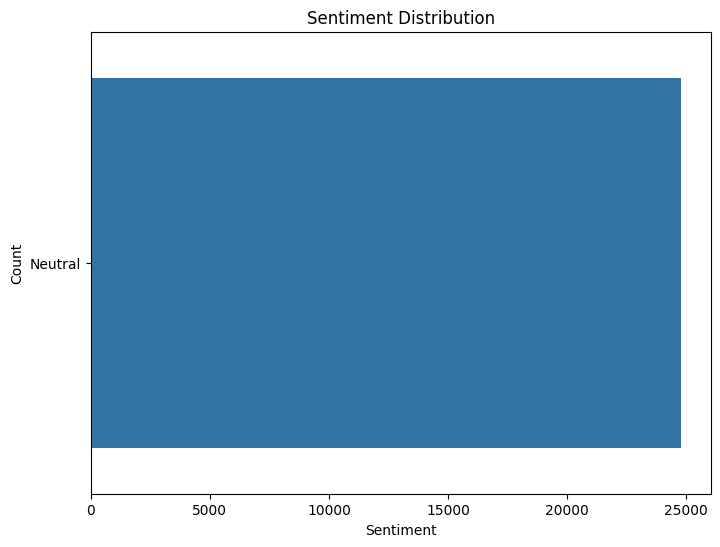

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(df['Sentiment'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [26]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['cleaned_text'].apply(get_sentiment)
df.head()


positive_tweets = df[df['Sentiment'] == 'Positive']['cleaned_text']
all_positive_tweets = ' '.join([text for text in positive_tweets])

# Check if all_positive_tweets is empty and handle it
if not all_positive_tweets:
    print("No positive tweets found. Cannot generate word cloud.")
else:
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_positive_tweets)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title('Word Cloud of Positive Tweets')
    plt.show()

No positive tweets found. Cannot generate word cloud.


In [28]:
def get_sentiment(text):
    analysis = TextBlob(text)
    # Handle empty strings
    if not text.strip():
        return 'Neutral'  # Or any default you deem appropriate
    elif analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['cleaned_text'].apply(get_sentiment)
df.head()


negative_tweets = df[df['Sentiment'] == 'Negative']['cleaned_text']
all_negative_tweets = ' '.join([text for text in negative_tweets])

# Check if all_negative_tweets is empty and handle it
if not all_negative_tweets:
    print("No negative tweets found. Cannot generate word cloud.")
else:
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_negative_tweets)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title('Word Cloud of Negative Tweets')
    plt.show()

No negative tweets found. Cannot generate word cloud.


In [11]:
df.to_csv('sentiment_analysis.csv', index=False)


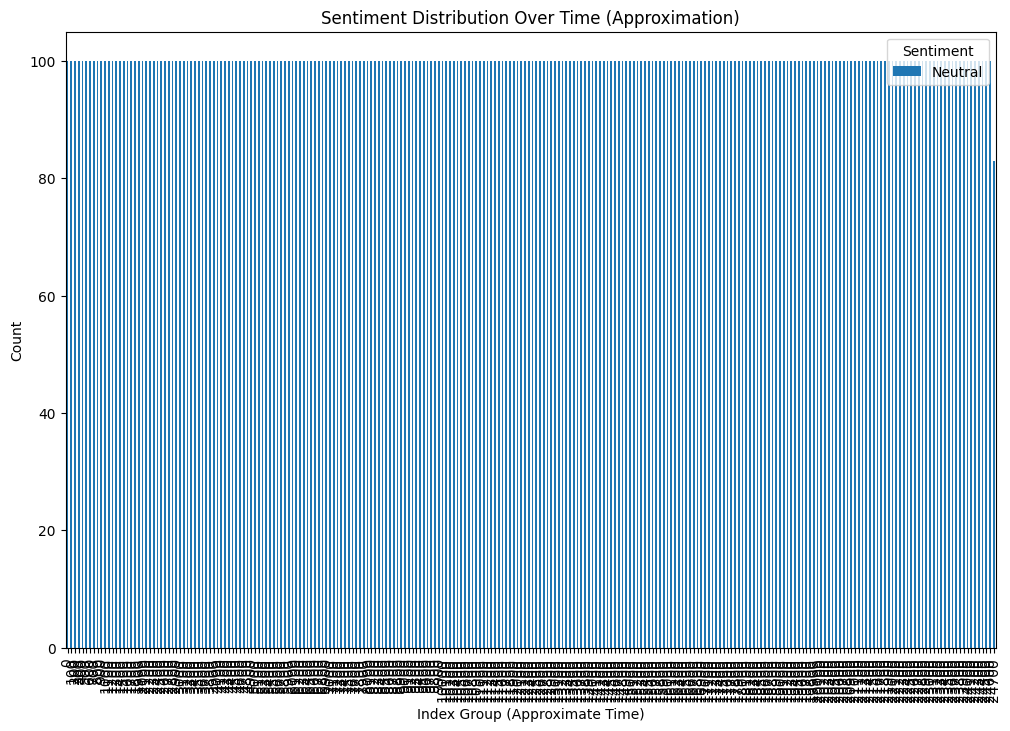

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a DataFrame called df
# If not, create a DataFrame from your data

# Instead of resampling, group by index ranges to approximate time intervals
group_size = 100
df['group'] = (df.index // group_size) * group_size

# Group by the new 'group' column and count sentiments
sentiment_counts = df.groupby('group')['Sentiment'].value_counts().unstack().fillna(0)

# Plot the sentiment distribution over these groups
sentiment_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Sentiment Distribution Over Time (Approximation)')
plt.xlabel('Index Group (Approximate Time)')
plt.ylabel('Count')
plt.show()